In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.fillna(0, inplace=True)
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] 

In [3]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

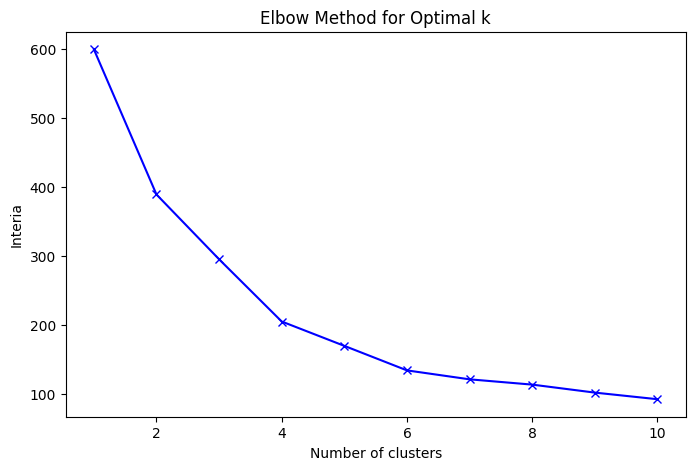

In [4]:
interia = []
K=range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    interia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, interia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Interia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [5]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k,random_state=42)
clusters = kmeans.fit_predict(normalized_features)

data['Cluster'] = clusters

silhouette_avg = silhouette_score(normalized_features,clusters)
print(f'silhouette Score: {silhouette_avg}')

silhouette Score: 0.3579234303882264


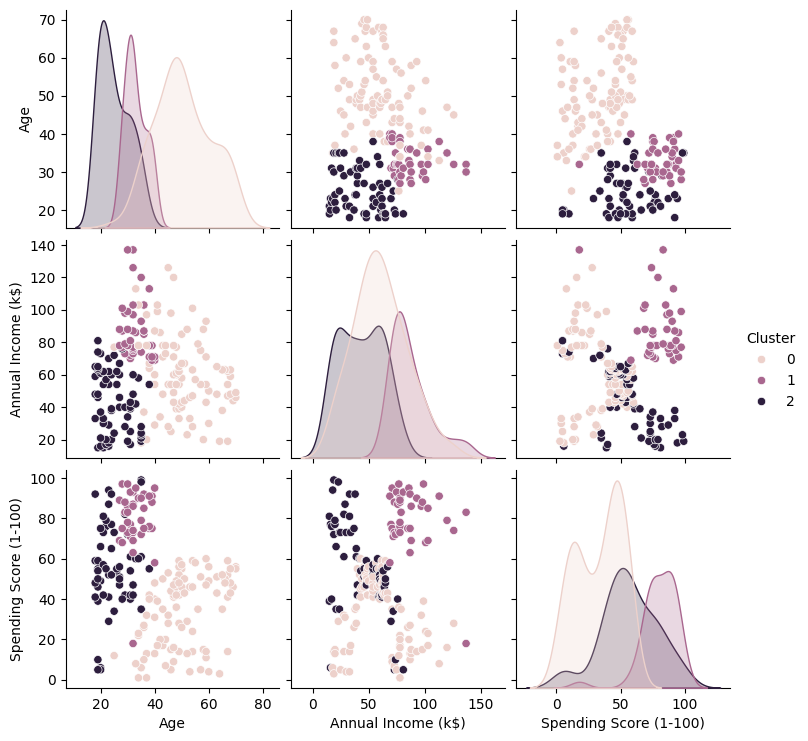

In [6]:
sns.pairplot(data, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()